In [1]:
import pandas as pd

df = pd.read_csv('data/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [3]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [4]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
df['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

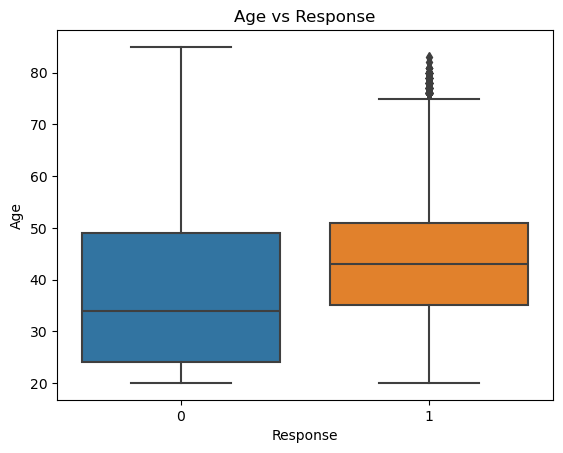

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Response', y='Age', data=df)
plt.title("Age vs Response")
plt.show()

In [8]:
print(df['Vehicle_Damage'].unique())
print(df['Response'].unique())

['Yes' 'No']
[1 0]


In [9]:
df['Vehicle_Damage'].isnull().sum()

0

In [11]:
df['Response'] = df['Response'].astype(str)

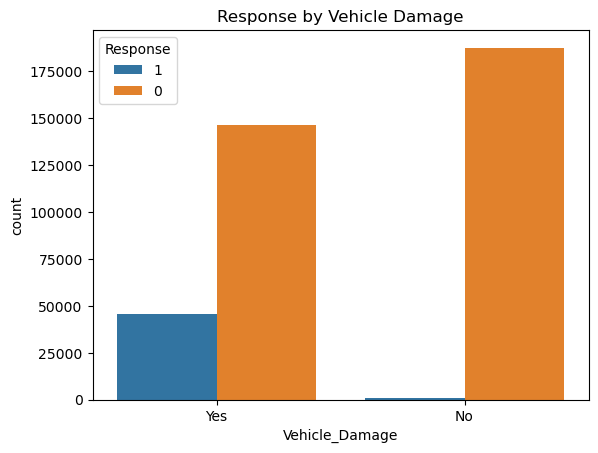

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Vehicle_Damage', data=df, hue='Response')
plt.title("Response by Vehicle Damage")
plt.show()

In [13]:
df['Response'] = df['Response'].astype(str)

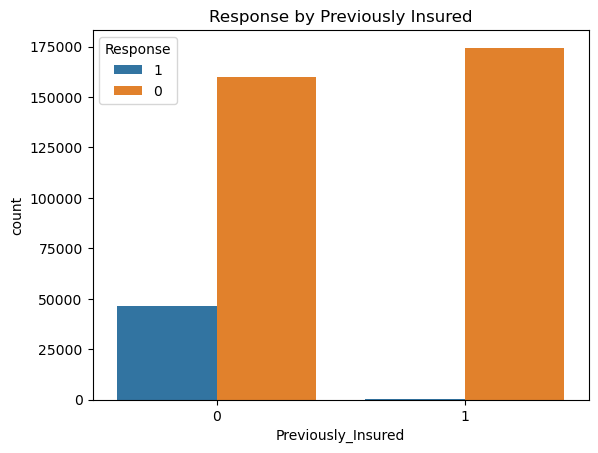

In [14]:
sns.countplot(x='Previously_Insured', data=df, hue='Response')
plt.title("Response by Previously Insured")
plt.show()

In [16]:
df['Response'] = df['Response'].astype(str)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


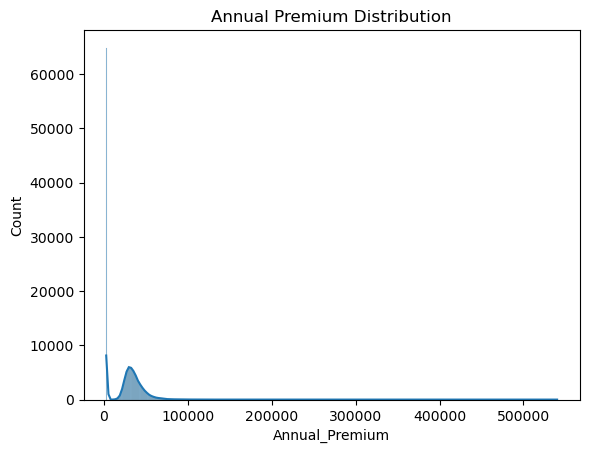

In [17]:
sns.histplot(df['Annual_Premium'], kde=True)
plt.title("Annual Premium Distribution")
plt.show()

### 🔍 Key Insights from EDA

- Only **12.3%** of customers responded positively (`Response = 1`)
- Most customers with `Vehicle_Damage = Yes` were more likely to respond
- Customers who are `Previously_Insured` rarely responded again
- `Annual_Premium` is highly skewed with a few high outliers